# Classification Approch

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline

#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.neighbors import KNeighborsClassifier


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

### PreProcess


In [2]:
X_train = pd.read_excel('../Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Training_Data')
X_test = pd .read_excel('../Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Test_Data')


#### Clean and Engeering Data

X_test=X_test.drop(['Attribute Information:'],axis=1)

y_train = X_train[' UNS']
X_train = X_train.drop([' UNS'], axis=1)


y_test = X_test[' UNS']
X_test =X_test.drop([' UNS','Unnamed: 6','Unnamed: 7'],axis=1)

X_train.info()

X_train

#OK

X_test.info()


#OK

y_test.value_counts()

y_train.value_counts()

y_train.value_counts()

#need to map
vTs={
    'Very Low':0,
    'very_low':0,
    'Low':1,
    'Middle':2,
    'High':3
}
y_train = y_train.map(vTs)

y_test.value_counts()

#need map
y_test = y_test.map(vTs)

#df['Output']= df['Output'].map({'N':1,'O':0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
dtypes: float64(5)
memory usage: 10.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     145 non-null    float64
 1   SCG     145 non-null    float64
 2   STR     145 non-null    float64
 3   LPR     145 non-null    float64
 4   PEG     145 non-null    float64
dtypes: float64(5)
memory usage: 5.8 KB


### Model

#### Create Model(s)

In [3]:
knn = KNeighborsClassifier()

In [4]:
pipe = Pipeline([('knn',knn)])

In [5]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [15]:
#hyper param value
n_neighbors= [1,3,5,7,9]
weights = ['uniform', 'distance', None]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [2,3,4,5,6,7,8,]

In [16]:
hyp_param ={
    'knn__n_neighbors':n_neighbors,
    'knn__weights':weights,
    'knn__algorithm':algorithm,
    'knn__p':p
}

In [17]:
full_model = GridSearchCV(estimator=pipe , param_grid=hyp_param,cv=5, verbose=2)

#### Train Model

In [18]:
full_model.fit(X_train,y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
[CV] END knn__algorithm=auto, knn__n_neighbors=1, knn__p=2, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=1, knn__p=2, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=1, knn__p=2, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=1, knn__p=2, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=1, knn__p=2, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=1, knn__p=2, knn__weights=distance; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=1, knn__p=2, knn__weights=distance; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=1, knn__p=2, knn__weights=distance; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=1, knn__p=2, knn__weights=distance; total time=   0.0s
[CV] END knn__algorithm

GridSearchCV(cv=5, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9],
                         'knn__p': [2, 3, 4, 5, 6, 7, 8],
                         'knn__weights': ['uniform', 'distance', None]},
             verbose=2)

### Evaluate model

In [19]:
y_pred = full_model.predict(X_test)

#### Test On data

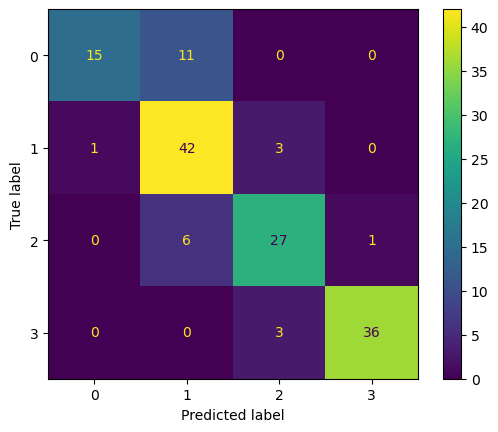

In [20]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred)
                       ,display_labels=full_model.classes_).plot()

In [21]:
print(classification_report(y_pred=y_pred,
                      y_true=y_test))

              precision    recall  f1-score   support

           0       0.94      0.58      0.71        26
           1       0.71      0.91      0.80        46
           2       0.82      0.79      0.81        34
           3       0.97      0.92      0.95        39

    accuracy                           0.83       145
   macro avg       0.86      0.80      0.82       145
weighted avg       0.85      0.83      0.83       145



In [22]:
full_model.best_params_

{'knn__algorithm': 'auto',
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'distance'}

### Final Model(s)


#### Train on all Data 

In [24]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

final_model = KNeighborsClassifier(algorithm='auto',n_neighbors=5,p=2,weights='distance')
final_model.fit(X,y)

KNeighborsClassifier(weights='distance')

#### Save with joblib

In [26]:
import joblib
joblib.dump(value=final_model,filename='knn.pkl')

['knn.pkl']

# Congratulations!!!

#### Created and trained by  Matin1099.
